In [1]:
import os
import pandas as pd

os.environ['OMP_NUM_THREADS'] = '1'


DADOS = r'../Dados\Mall_Customer_no_CustomerID.csv'

df = pd.read_csv(DADOS)

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(

    [
        ("standard",StandardScaler(),['Age','Annual Income (k$)', 'Spending Score (1-100)']),
        ('onehot', OneHotEncoder(), ['Gender'])
    ]
)

df_scaled = pd.DataFrame(preprocessing.fit_transform(df), columns=preprocessing.get_feature_names_out())

df_scaled.head()

,standard__Age,standard__Annual Income (k$),standard__Spending Score (1-100),onehot__Gender_Female,onehot__Gender_Male
0,-1.424569,-1.738999,-0.434801,0.0,1.0
1,-1.281035,-1.738999,1.195704,0.0,1.0
2,-1.352802,-1.700830,-1.715913,1.0,0.0
3,-1.137502,-1.700830,1.040418,1.0,0.0
4,-0.563369,-1.662660,-0.395980,1.0,0.0


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

RANDOM_STATE = 42

pipeline = Pipeline(

[
    ('preprocessing', preprocessing),
    ('pca', PCA(n_components=3, random_state=RANDOM_STATE)),
    ('clustering',KMeans(n_clusters=5, random_state=RANDOM_STATE, n_init=10))
]

)

pipeline.fit(df)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('standard', StandardScaler(),
                                                  ['Age', 'Annual Income (k$)',
                                                   'Spending Score (1-100)']),
                                                 ('onehot', OneHotEncoder(),
                                                  ['Gender'])])),
                ('pca', PCA(n_components=3, random_state=42)),
                ('clustering',
                 KMeans(n_clusters=5, n_init=10, random_state=42))])

In [5]:
import joblib

joblib.dump(pipeline, '../Modelos/pipeline_preprocessing_pca_clustering.pkl')

['../Modelos/pipeline_preprocessing_pca_clustering.pkl']

In [6]:
pipeline.get_feature_names_out()

array(['kmeans0', 'kmeans1', 'kmeans2', 'kmeans3', 'kmeans4'],
      dtype=object)

In [7]:
pipeline['clustering'].labels_

array([1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 0, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 1,
       0, 3, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 4, 1, 4, 2, 4, 2, 4, 2, 4,
       1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 0, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [8]:
df_clustered = df.copy()
df_clustered['Cluster'] = pipeline['clustering'].labels_

df_clustered.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,1
1,Male,21,15,81,3
2,Female,20,16,6,1
3,Female,23,16,77,3
4,Female,31,17,40,1


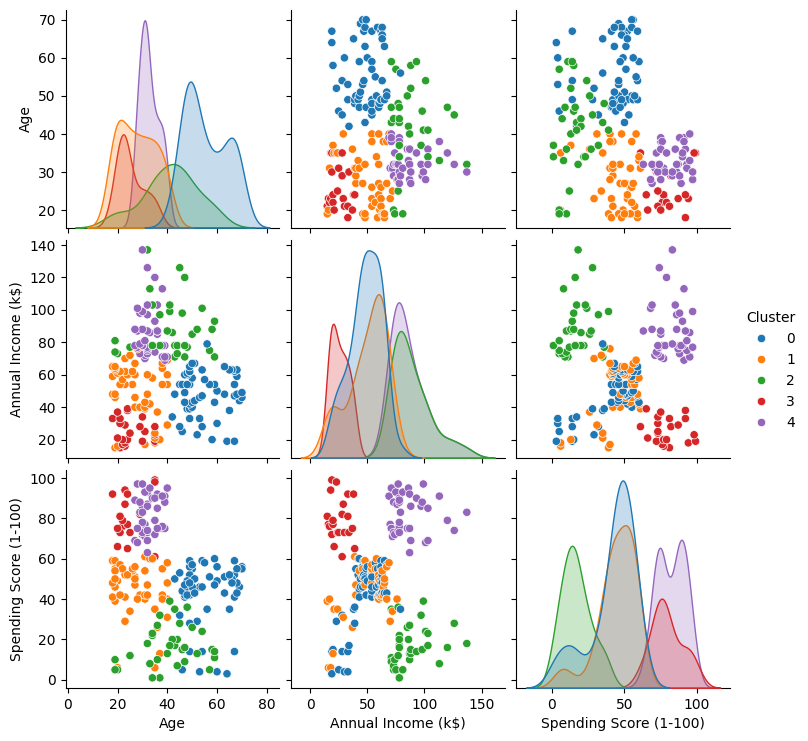

In [9]:
import seaborn as sns

sns.pairplot(df_clustered, diag_kind='kde', hue='Cluster', palette='tab10');

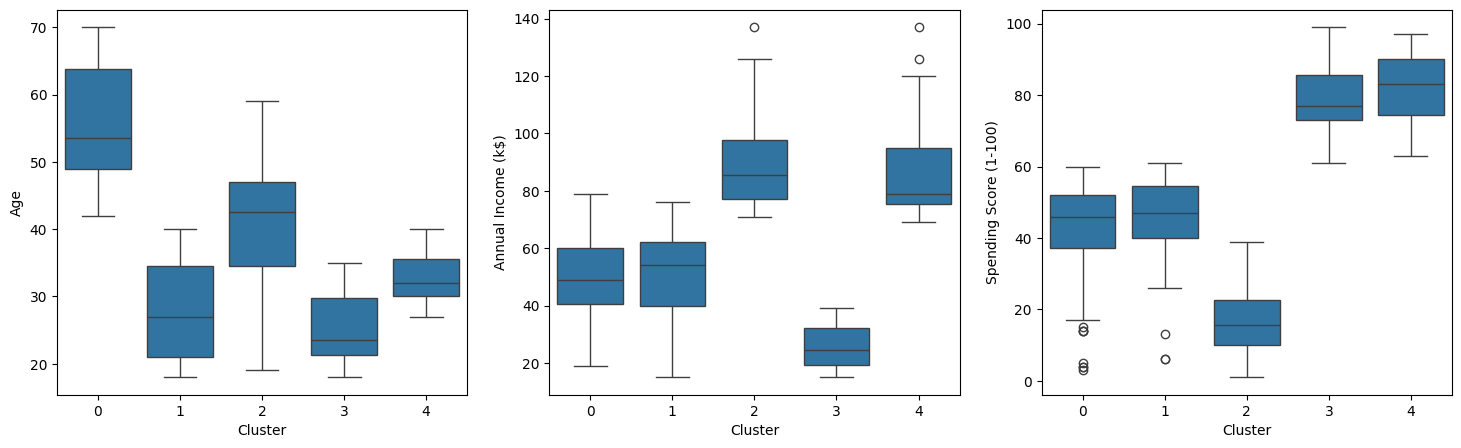

In [10]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for ax, col in zip(axs,df_clustered.select_dtypes('number')):
    sns.boxplot(data=df_clustered, x='Cluster', y=col, ax=ax)

plt.show()

In [11]:
df_clustered['Cluster'].value_counts().sort_index()

Cluster
0    58
1    47
2    34
3    22
4    39
Name: count, dtype: int64

In [12]:
df_clustered.groupby(['Cluster','Gender']).size()

Cluster  Gender
0        Female    33
         Male      25
1        Female    31
         Male      16
2        Female    14
         Male      20
3        Female    13
         Male       9
4        Female    21
         Male      18
dtype: int64

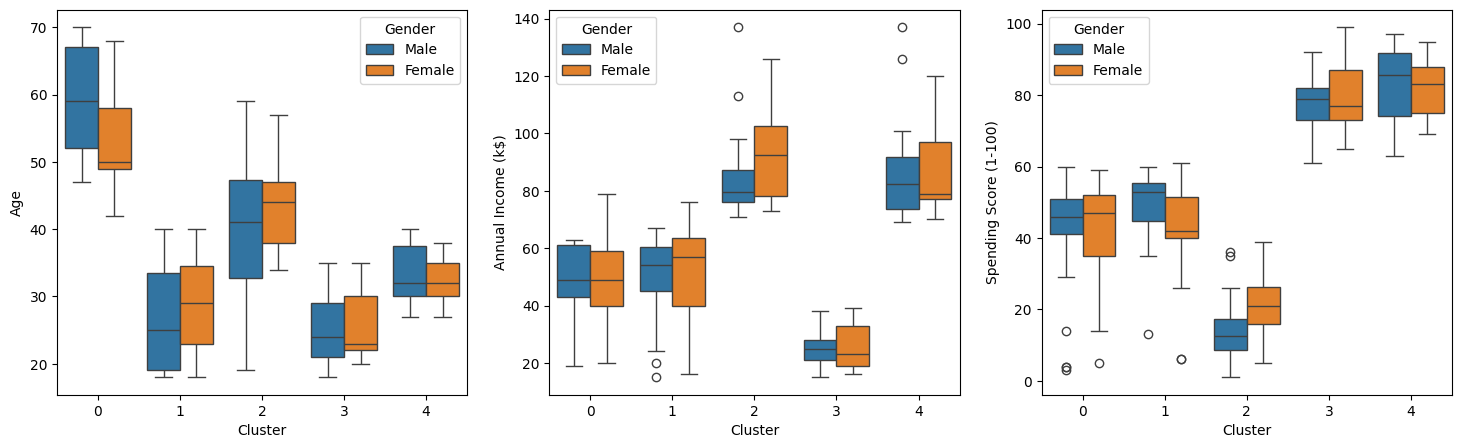

In [13]:
fig,axs = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

for ax, col in zip(axs,df_clustered.select_dtypes('number')):
    sns.boxplot(data=df_clustered, x='Cluster', y=col, ax=ax, hue='Gender')

plt.show()

In [14]:
pipeline['preprocessing'].get_feature_names_out()

array(['standard__Age', 'standard__Annual Income (k$)',
       'standard__Spending Score (1-100)', 'onehot__Gender_Female',
       'onehot__Gender_Male'], dtype=object)

In [15]:
pipeline['pca'].components_

array([[ 0.70508424, -0.03921531, -0.70473508, -0.04830549,  0.04830549],
       [ 0.02024387,  0.996115  , -0.02730038, -0.05744471,  0.05744471],
       [-0.70661643, -0.00434967, -0.70753413,  0.00590595, -0.00590595]])

In [16]:
pipeline['pca'].get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [17]:
pipeline['clustering'].cluster_centers_

array([[ 1.09281997, -0.42702742, -0.61346816],
       [-0.39283157, -0.42287385,  0.70807382],
       [ 1.00944112,  1.11828568,  0.78954352],
       [-1.4357643 , -1.37856558, -0.10638215],
       [-1.2219143 ,  0.94742028, -0.56929202]])

In [19]:
df_pca = pd.DataFrame(pipeline[:-1].fit_transform(df), columns=pipeline[:-1].get_feature_names_out())

df_pca.head()

,pca0,pca1,pca2
0,-0.575724,-1.684874,1.315210
1,-1.623595,-1.726481,0.060149
2,0.279614,-1.725314,2.182574
3,-1.511064,-1.796205,0.080242
4,-0.095468,-1.707347,0.690684


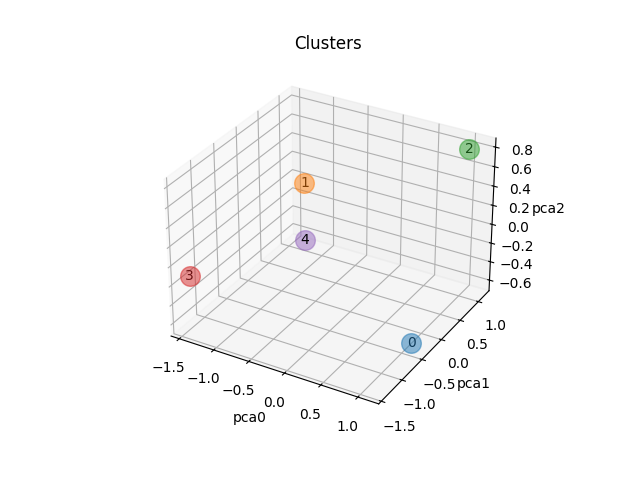

In [20]:
centroids = pipeline['clustering'].cluster_centers_

%matplotlib ipympl
from Funcoes_Auxiliares import visualizar_clusters

visualizar_clusters(dataframe=df_pca,colunas=['pca0','pca1', 'pca2'],qtd_cores=5, centroids=centroids)

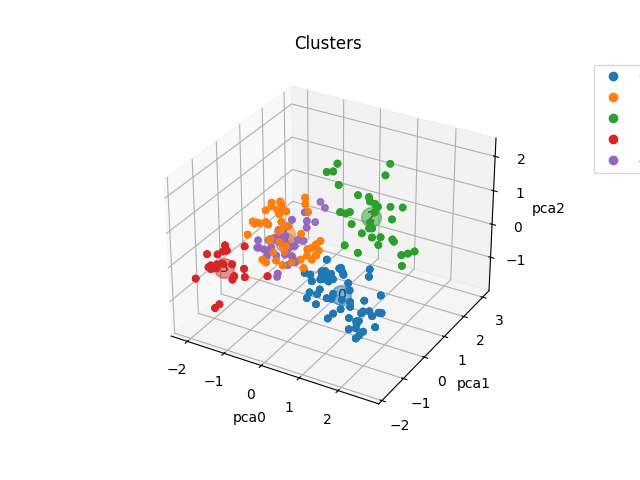

In [21]:
%matplotlib ipympl
from Funcoes_Auxiliares import visualizar_clusters

visualizar_clusters(dataframe=df_pca,
                    colunas=['pca0','pca1', 'pca2'],
                    qtd_cores=5, 
                    centroids=centroids,
                    mostrar_pontos=True,
                    coluna_custers=df_clustered['Cluster']
                    )